In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

 #### Сделаем EDA над набором данных cardio

In [20]:
df=pd.read_csv('cardio_train.csv',sep=';')
df.info()
# отмечаем отстутсвие порпущенных значений в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [21]:
# смотрим на данные
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
# Если признаков (столбцов) слишком много, то может быть полезно транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Подсчет значений в столбце cardio
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [25]:
# Параметр normalize позволяет узнать процентное соотношение
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

Классы 1 и 0 в наших данных сбалансированы !!!

<AxesSubplot:>

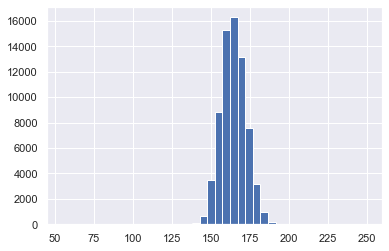

In [26]:
# Оценим распределение признака Рост гистограммой 
df.height.hist(bins=40)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

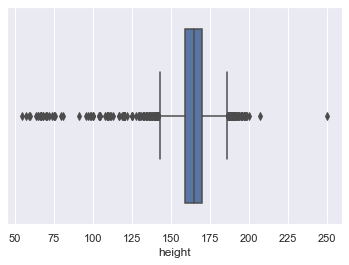

In [27]:
# Оценим распределение признака Рост боксплотом 
sns.boxplot(df.height)

Ширина "ящика" равна интерквартильному размаху (разность между третьим  Q3  и первым  Q1  квартилями). Вертикальная линия внутри ящика показывает медиану (второй квартиль). "Усики" ограничивают точки, попадающие в интервал  [Q1−1.5∗IQR;Q3+1.5∗IQR] , где  IQR  --- интерквартильный размах. Отдельные точки на графике соответствуют выбросам --- нетипичным для данной выборки значениям. Как видим, их оказалось довольно много.

In [28]:
# преобразуем признак age в годы
df['age'] = (df['age'] / 365).round()
df.age.head()

0    50.0
1    55.0
2    52.0
3    48.0
4    48.0
Name: age, dtype: float64

Оценим связь возраста и наличия у человека кардио заболеваний

In [29]:

df.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

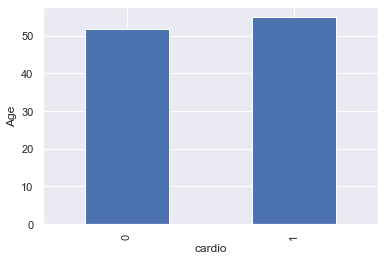

In [30]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

Посмотрим, как распределено количество здоровых и больных пациентов по возрастным группам. Воспользуемся countplot библиотеки Seaborn.

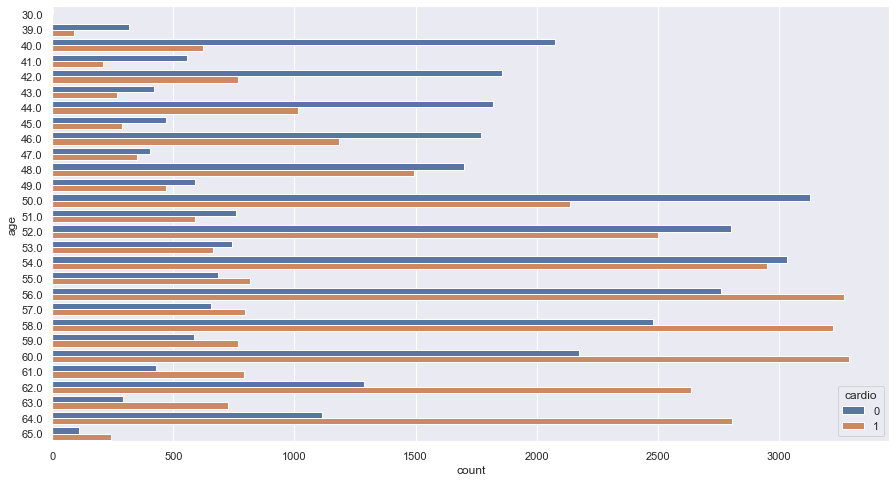

In [31]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=df);

Наблюдаем что начиная с 55 лет количество больных пациентов превышает количество здоровых.

Полезным типом графика для исследования пар числовых признаков является диаграмма рассеяния (scatter plot). Рассмотрим возраст и рост пациентов.

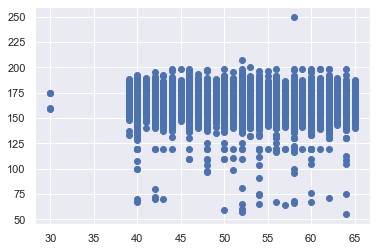

In [33]:
plt.scatter(df['age'], df['height'])

Можно допустить, что наши выбросы в данных - это просто ошибки ввода. Если, конечно, мы не проводили исследование среди лиллипутов :)

Для изучения совместного распределения двух числовых признаков полезно воспользоваться jointplot библиотеки Seaborn

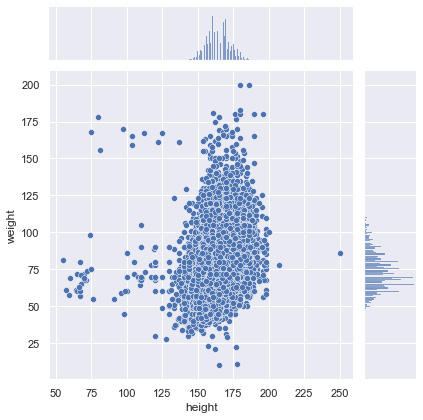

In [34]:
sns.jointplot(x='height', y='weight', data=df);

Для исследования трёх и более признаков полезным инструментов являются сводные таблицы (pivot tables). Этот инструмент хорошо знаком продвинутым пользователям электронных таблиц Excel, Google Spreadsheets. Рассмотрим, как с помощью сводной таблицы ответить на вопросы:

верно ли, что с возрастом люди становятся более склонны к употреблению алкоголя;

верно ли, что среди курящих процент ССЗ больше.

In [35]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

Чтобы понять, как связаны употребление алкоголя и курение, посмотрим на кросс-таблицу (таблицу сопряжённости):

In [36]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,61921,1910
1,4315,1854


Пока можно только сказать, что непьющих и некурящих пациентов существенно больше, чем всех остальных. Для обоснованных выводов о взаимосвязи следует обратиться к численным расчётам.

In [37]:
h = df['height'] # сохраним всю колонку "рост" в отдельную переменную для экспериментов
type(h) # посмотрим тип 

pandas.core.series.Series

In [39]:
first_patient = df.iloc[0]
print(first_patient)

id               0.0
age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64


In [41]:
h_meters = h / 100 # переведем в метры
h_meters[:10] # в отдельных столбцах уже можно применять "обычные" срезы, как в списках

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
5    1.51
6    1.57
7    1.78
8    1.58
9    1.64
Name: height, dtype: float64

Выше на нескольких диаграммах мы видели, что среди значений роста присутствуют ошибки. Посмотрим, сколько пациентов имеют рост ниже 125 см.

In [42]:
lilliputs = 0
for value in h:
    if value < 125:
        lilliputs = lilliputs + 1

In [43]:
h[h < 125].shape[0]

87

In [44]:
# Вычислим средний возраст людей, склонных к курению
df[df['smoke'] == 1]['age'].mean()

52.29664451288701

In [45]:
# Условие может быть составным
df[(df['smoke'] == 1) & (df['cardio'] == 1)]['age'].mean()

53.76135199726869

In [46]:
# Удалим целевой признак cardio
dummy_df = df.drop('cardio', axis=1)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [47]:
# Удалим всех пацентов с ростом ниже 125 см, а также выше 200 см
dummy_df = df.drop(df[(df['height'] < 125) | (df['height'] > 200)].index)
dummy_df.shape[0] / df.shape[0]

0.9987285714285714

Как видим, процент выбросов небольшой --- оставшаяся выборка составляет 99.9 % исходной.

Добавление новых признаков

In [48]:
df['height_cm'] = df['height'] / 100
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56


Перекодировка значений признаков
Наш датасет содержит только числовые значения, однако часто среди признаков есть категориальные, и в этом случае на этапе предобработки нужно применить один из видов кодирования. Простейший тип кодирования - замена одних значений другими (label encoding). В данном случае нам придётся (исключительно с целью продемонстрировать работу метода) применить обратную операцию. Например, перекодируем признак "уровень холестерина" по принципу:

1 --- "low"

2 --- "normal"

3 --- "high"

In [49]:
new_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
df['dummy_cholesterol'] = df['cholesterol'].map(new_values)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56,low


In [50]:
# Перекодируем целевой признак cardio в логический (True/False)
df['cardio'] = df['cardio'].astype(bool)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low
